### Required Libaries

In [30]:
import json 
import re 
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.corpus import stopwords


In [4]:
# Local File Path 
file_path = "C:\\Users\\smeet\Desktop\\data science capstone\\Image_Description_Application-main\\data_structure\\captions.txt"

# opening the 'Captions' text file
with open(file_path, 'r') as f:
    lines = f.readlines()

# Saving the file according to data structure decided
data  = {}
current_id = 1 

for line in lines[1:]:
    image_id, description = line.split(',',1)
    image_name = image_id.strip()
    description = description.strip()

    data[current_id] =  [image_name, description]
    current_id +=1 

### saving to json

In [5]:
# saving the image-captions data structure into json
file_name =  'data_captions.json'

with open(file_name, 'w') as json_file:
    json.dump(data, json_file)

print(f"Data saved to {file_name}")

Data saved to data_captions.json


### Preprocessing the text

In [41]:
def clean_text(text, counts):
    # converting to lower case
    text = text.lower()

    # removing hyperlinks
    if 'http' in text:
        counts['hyperlinks'] +=1
        text = re.sub(r'http\S+', '', text)

    # removing random characters and punctuations
    if re.search(r'[^a-zA-Z0-9\s]', text):
        counts['special_characters'] += 1
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra whitespace.
    if '  ' in  text:
        counts['extra_spaces'] +=1 
        text = ' '.join(word.strip() for word in text.split())

    return text


def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# building the vocabulary form our captions text
def build_vocabulary(texts):
    vocabulary = set()
    for text in texts:
        tokens = tokenize_text(text)
        vocabulary.update(tokens)
    return vocabulary

# Model model may require same number of lengths -- saved for future reference
def pad_sequences_for_models(sequences, max_length):
    return pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


# final preprocessing function
def preprocess_caption_with_info(caption , counts):
    cleaned_caption = clean_text(caption , counts)
    # tokenization
    tokens = tokenize_text(cleaned_caption) 
    # preprocessed captions
    processed_captions =  ' '.join(tokens)
    #return the final processed captions
    return processed_captions



In [44]:
def preprocess_captions_in_json(json_file):

    # read the json file
    with open(json_file, 'r') as f :
        data = json.load(f)


    # Initialize counts for statistics
    total_counts = {'hyperlinks': 0, 'special_characters': 0, 'extra_spaces': 0}

    # preprocess each image and its captions
    for image_id , (image_name, caption) in data.items():

        # Initialize counts for each image
        image_counts = {'hyperlinks': 0, 'special_characters': 0, 'extra_spaces': 0}

        # Preprocess the caption for the current image
        processed_caption = preprocess_caption_with_info(caption, image_counts)

        # update the total counts 
        for key,value in image_counts.items():
            total_counts[key] += value 

        # update the data with the preprocessed caption
        data[image_id][1] = processed_caption


    # Save the processed data back to the JSON file
    file_name =  'data_captions_processed.json'

    with open(file_name.replace, 'w') as json_file:
        json.dump(data, json_file)

    print(f"Data saved to {file_name}")

    return total_counts

In [46]:
total_counts = preprocess_captions_in_json('data_captions.json')

Data saved to data_captions_processed.json


### Basic Visualizations of the Text

#### 1. wordcloud

In [9]:
with open('data_captions_processed.json','r')  as f:
    data = json.load(f)

{'1': ['1000268201_693b08cb0e.jpg',
  'a child in a pink dress is climbing up a set of stairs in an entry way'],
 '2': ['1000268201_693b08cb0e.jpg', 'a girl going into a wooden building'],
 '3': ['1000268201_693b08cb0e.jpg',
  'a little girl climbing into a wooden playhouse'],
 '4': ['1000268201_693b08cb0e.jpg',
  'a little girl climbing the stairs to her playhouse'],
 '5': ['1000268201_693b08cb0e.jpg',
  'a little girl in a pink dress going into a wooden cabin'],
 '6': ['1001773457_577c3a7d70.jpg',
  'a black dog and a spotted dog are fighting'],
 '7': ['1001773457_577c3a7d70.jpg',
  'a black dog and a tricolored dog playing with each other on the road'],
 '8': ['1001773457_577c3a7d70.jpg',
  'a black dog and a white dog with brown spots are staring at each other in the street'],
 '9': ['1001773457_577c3a7d70.jpg',
  'two dogs of different breeds looking at each other on the road'],
 '10': ['1001773457_577c3a7d70.jpg',
  'two dogs on pavement moving toward each other'],
 '11': ['10026

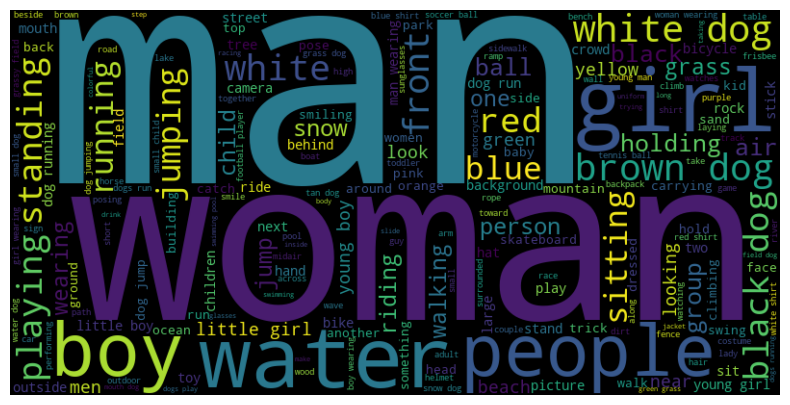

In [21]:

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800 , height = 400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

all_captions = " ".join([" ".join(caption[1].split()[1:]) for caption in data.values()])
generate_wordcloud(all_captions)

#### 2. Caption Length Distribution

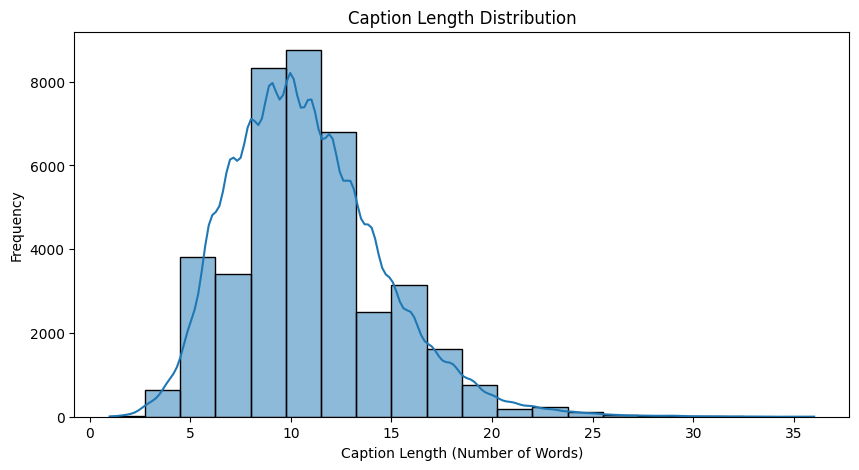

In [23]:
# histogram to visualize the distribution of caption lengths
def plot_caption_length_distribution(captions):
    caption_lengths = [len(caption.split())  for caption in captions]
    plt.figure(figsize=(10,5))
    sns.histplot(caption_lengths, bins=20, kde=True)
    plt.title('Caption Length Distribution')
    plt.xlabel('Caption Length (Number of Words)')
    plt.ylabel('Frequency')
    plt.show()

all_captions = [caption[1] for caption in data.values()]
plot_caption_length_distribution(all_captions)

#### 3. Bar Charts for Word Frequency.

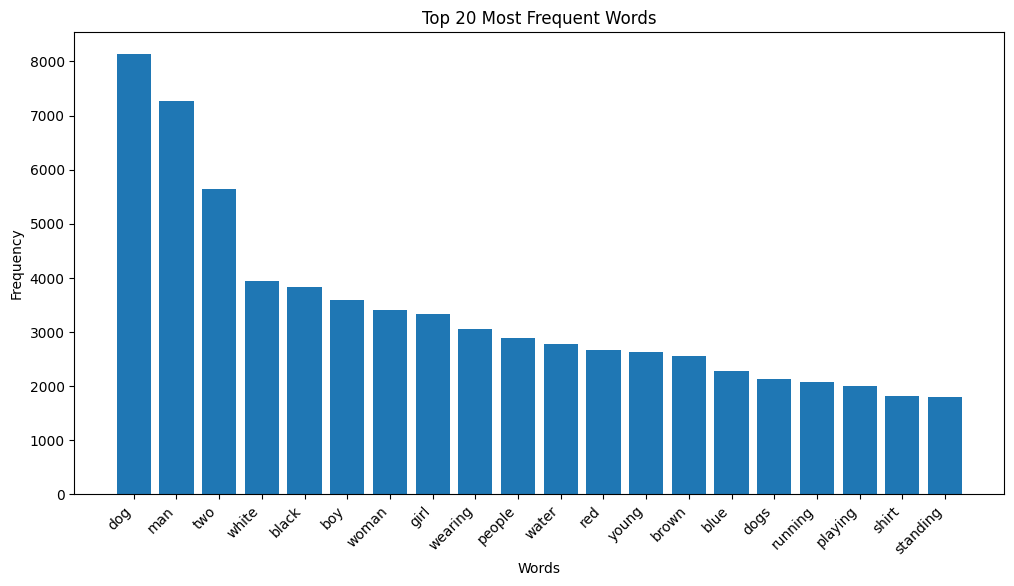

In [32]:
from collections import Counter

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

def plot_word_frequency_bar_chart(captions, top_n=20):
    all_words = " ".join(captions)
    filtered_words = remove_stopwords(all_words)
    word_counts = Counter(filtered_words)
    top_words = dict(word_counts.most_common(top_n))

    plt.figure(figsize=(12, 6))
    plt.bar(top_words.keys(), top_words.values())
    plt.title('Top {} Most Frequent Words'.format(top_n))
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example usage
all_captions = [caption[1] for caption in data.values()]
plot_word_frequency_bar_chart(all_captions)

#### 4. HeatMap for Co-Occurence

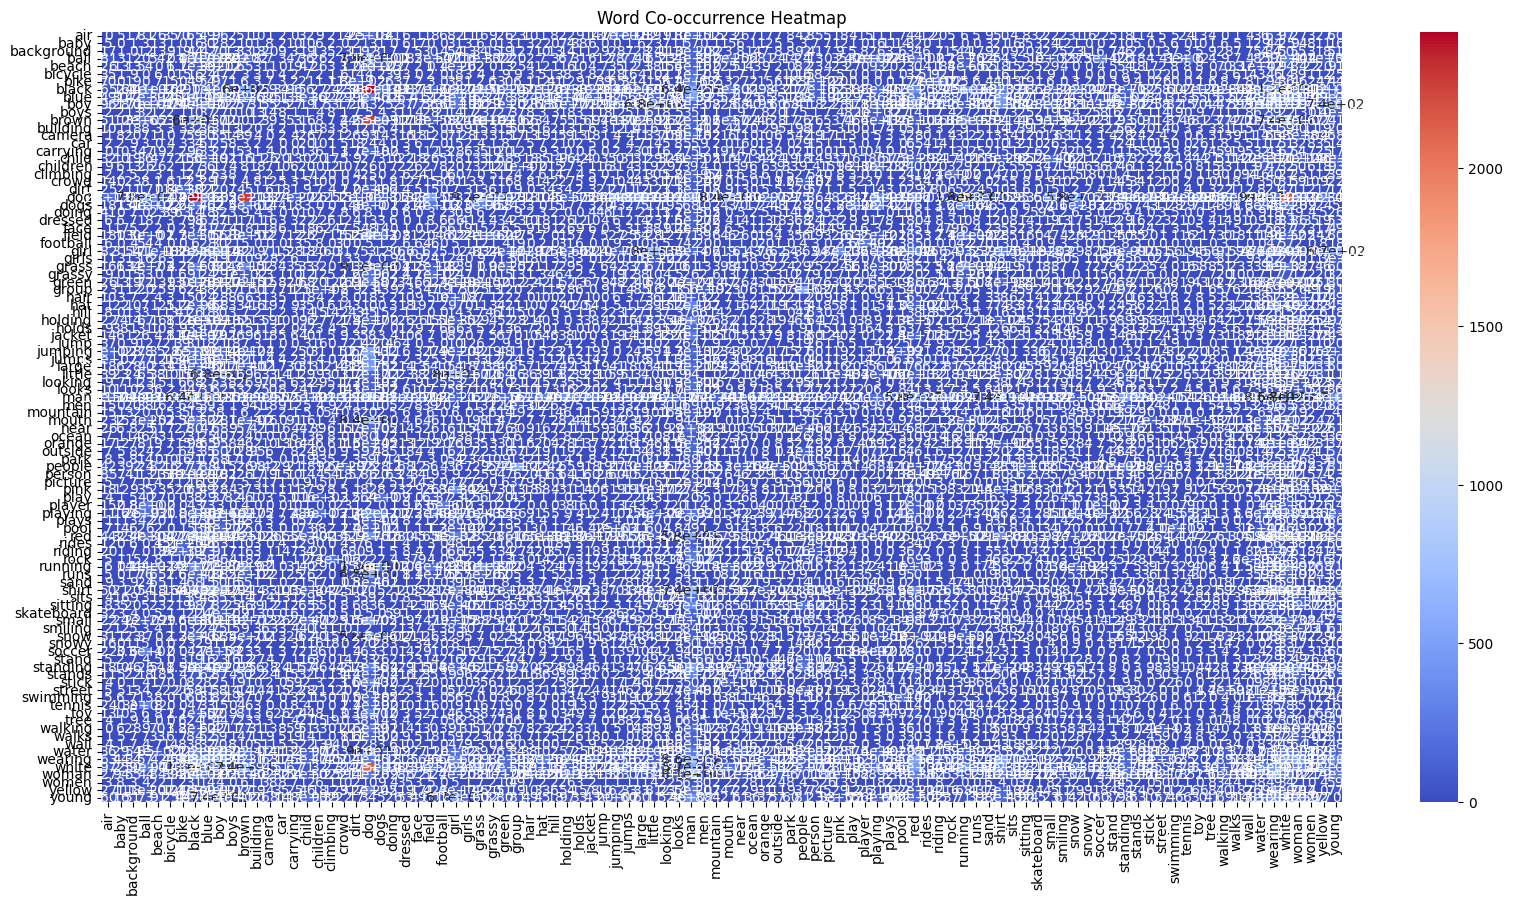

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_cooccurrence_heatmap(captions, max_features=100):
    vectorizer = CountVectorizer(max_features=max_features, stop_words='english')
    X = vectorizer.fit_transform(captions)

    cooccurrence_matrix = X.T * X
    cooccurrence_matrix.setdiag(0)

    plt.figure(figsize=(20,10))
    sns.heatmap(cooccurrence_matrix.toarray(), xticklabels=vectorizer.get_feature_names_out(),
                yticklabels=vectorizer.get_feature_names_out(), cmap='coolwarm', annot=True)
    plt.title('Word Co-occurrence Heatmap')
    plt.show()

# Example usage
all_captions = [caption[1] for caption in data.values()]
plot_cooccurrence_heatmap(all_captions)

#### 6. Sentiment Analysis Trend

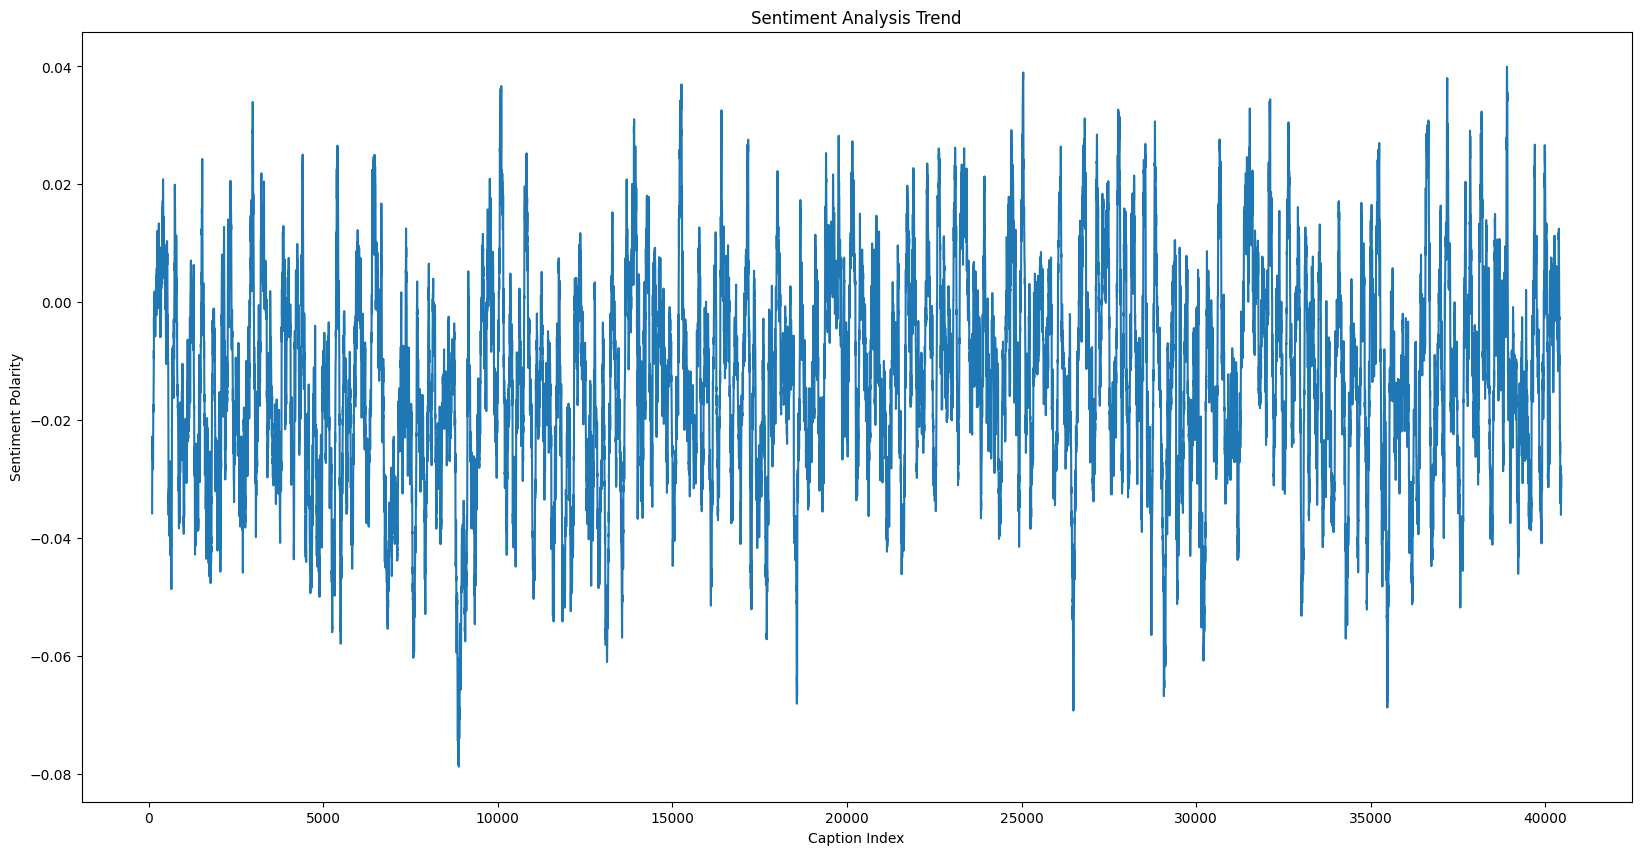

In [38]:
from textblob import TextBlob
import pandas as pd

def plot_sentiment_analysis_trend(captions):
    sentiments = [TextBlob(caption).sentiment.polarity for caption in captions]
    df = pd.DataFrame({'Sentiment': sentiments})

    plt.figure(figsize=(20, 10))
    plt.plot(df['Sentiment'].rolling(window=100).mean())  # Smoothed trend
    plt.title('Sentiment Analysis Trend')
    plt.xlabel('Caption Index')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# Example usage
all_captions = [caption[1] for caption in data.values()]
plot_sentiment_analysis_trend(all_captions)


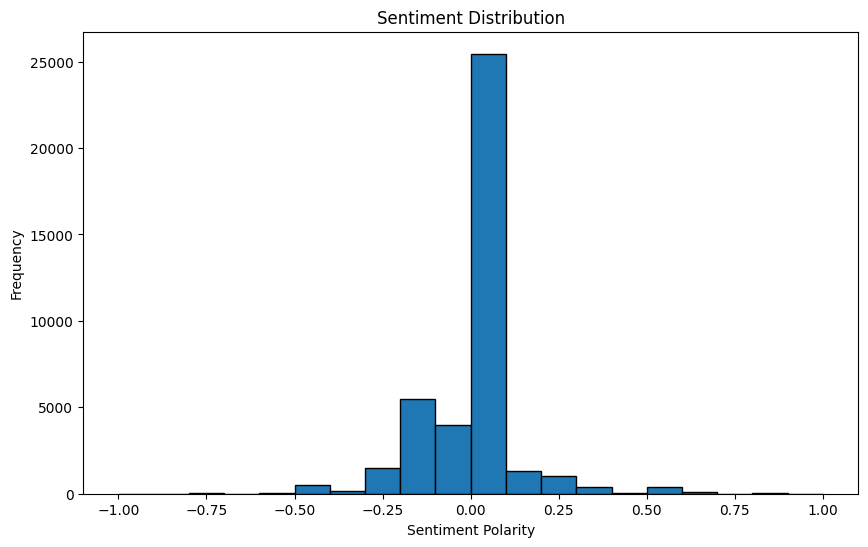

In [57]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

def plot_sentiment_distribution(captions):
    sentiments = [TextBlob(caption).sentiment.polarity for caption in captions]
    df = pd.DataFrame({'Sentiment': sentiments})

    plt.figure(figsize=(10, 6))
    plt.hist(df['Sentiment'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
all_captions = [caption[1] for caption in data.values()]
plot_sentiment_distribution(all_captions)


#### 7. Topic Modelling and T-SNE

TypeError: doc2bow expects an array of unicode tokens on input, not a single string